In [1]:
#import lib
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt


In [2]:
#twitter api keys
consumerKey= "bBXNgLsfieKeQgSV7VZnVBCMI"
consumerSecret= "m7ReNV8XInKmorx7UcLTeeT0n9ESmVqv5bYFkON1nHSRPH8DYD"
accessToken= '1341779166513909766-Fg24XF509ApYd7vbJOWbj4Gn8d2AtZ'
accessTokenSecret= 'yxZntFbY0nm9LzHxjqFPpKvuAbVp7ZLaMJQV1ijVYDmYN'

In [3]:
#create authentication object

authenticate= tweepy.OAuthHandler(consumerKey,consumerSecret)

#set access token & secret
authenticate.set_access_token(accessToken,accessTokenSecret)

#create apiobject while passing in auth info
api=tweepy.API(authenticate,wait_on_rate_limit=True)

In [4]:
#Extract tweets from ElonMusk

post=api.user_timeline(screen_name='elonmusk',count=100,lang='en',tweet_mode='extended')

#print last 5 tweets
print('last5\n')
for tweet in post[0:5]:
    print(tweet.full_text+'\n')

last5

@OLHZN Minor

@TrevorMahlmann Yeah

12 story rocket turns off its engines &amp; does a controlled fall https://t.co/HCRgyx42rn

@Erdayastronaut Yup, we’re just ironing out a few bugs

To Tesla owners taking delivery in the final days of year, your support is super appreciated!!



In [7]:
#create dataframe
df=pd.DataFrame([tweet.full_text for tweet in post],columns=['Tweets'])
df.head(20)

,Tweets
0,@OLHZN Minor
1,@TrevorMahlmann Yeah
2,12 story rocket turns off its engines &amp; do...
3,"@Erdayastronaut Yup, we’re just ironing out a ..."
4,To Tesla owners taking delivery in the final d...
5,@DeepMind @nature Frictionless AI. What could ...
6,@heydave7 Good idea
7,@wintonARK During the darkest days of the Mode...
8,"@wintonARK Strange, if true. \n\n- Tesla alrea..."
9,@archillect Sparta’s reply to Macedon


In [11]:
#clean the tweets

def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    text=re.sub(r"#",'',text)
    text=re.sub(r"RT[\s]+",'',text)
    text=re.sub(r"https?:\/\/\S+",'',text)
    
    return text

df['Tweets']=df['Tweets'].apply(cleanTxt)

df

,Tweets
0,Minor
1,Yeah
2,12 story rocket turns off its engines &amp; do...
3,"Yup, we’re just ironing out a few bugs"
4,To Tesla owners taking delivery in the final d...
...,...
95,Out on the pad in South Texas
96,_Station: The station and the Dragon are goin...
97,"_Station Wow, Station looks amazing!"
98,": Good morning, earthlings. ☀️ The journey con..."


In [14]:
#create function to get subjectivity and polarity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#creating those colums in df
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)

df['Polarity']=df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,Minor,0.200000,-0.050000
1,Yeah,0.000000,0.000000
2,12 story rocket turns off its engines &amp; do...,0.000000,0.000000
3,"Yup, we’re just ironing out a few bugs",0.100000,-0.200000
4,To Tesla owners taking delivery in the final d...,0.588889,0.215278
...,...,...,...
95,Out on the pad in South Texas,0.000000,0.000000
96,_Station: The station and the Dragon are goin...,0.000000,0.000000
97,"_Station Wow, Station looks amazing!",0.950000,0.425000
98,": Good morning, earthlings. ☀️ The journey con...",0.600000,0.875000


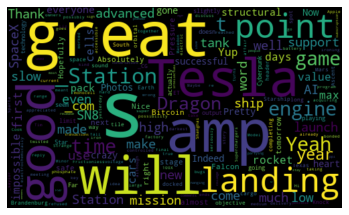

In [19]:
#Visualizing Word cloud

allwords=' '.join([twts for twts in df['Tweets']])
wordcloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allwords)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
#create fn for positive negative and neutral

def getAnalysis(score):
    if score > 0:
        return 'Positive'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Negative'
    
df['Analysis']=df['Polarity'].apply(getAnalysis)

df


,Tweets,Subjectivity,Polarity,Analysis
0,Minor,0.200000,-0.050000,Negative
1,Yeah,0.000000,0.000000,Neutral
2,12 story rocket turns off its engines &amp; do...,0.000000,0.000000,Neutral
3,"Yup, we’re just ironing out a few bugs",0.100000,-0.200000,Negative
4,To Tesla owners taking delivery in the final d...,0.588889,0.215278,Positive
...,...,...,...,...
95,Out on the pad in South Texas,0.000000,0.000000,Neutral
96,_Station: The station and the Dragon are goin...,0.000000,0.000000,Neutral
97,"_Station Wow, Station looks amazing!",0.950000,0.425000,Positive
98,": Good morning, earthlings. ☀️ The journey con...",0.600000,0.875000,Positive


In [23]:
df.shape

(100, 4)

In [24]:
#print all positive
j=1
sortedDF=df.sort_values(by=['Polarity'])
for  i in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Positive'):
        print(str(j)+')'+sortedDF['Tweets'][i])
        print()
        j=j+1
    

1)To Tesla owners taking delivery in the final days of year, your support is super appreciated!!

2) Good idea

3)Thanks to everyone who worked so hard to make Tesla successful. My heart goes out to you.

4) They are, although it’s kind low-key. Tesla Superchargers are being made accessible to other electric cars.

5)_saylor Are such large transactions even possible?

6) Great game

7) Pretty much. The main value of college used to be hanging out, having pseudo intellectual conversations &amp; partying with people your own age. Now, even that’s gone.

8) Absolutely. We will release FSD subscription early next year.

9)_miloslav Great nails &amp; lipstick

10)  _kalo        Nice

11) Sounds about right

12) _thelen Nice branding

13)Just kidding, who needs a safe word anyway!?

14)Bitcoin is my safe word

15): Falcon 9’s first stage has landed on Landing Zone 1 

16) Pressure is slightly high in upper stage liquid oxygen tank. Review underway.

17) Very impressive mission by China!

18)

In [25]:
#print all Negative
j=1
sortedDF=df.sort_values(by=['Polarity'],ascending='False')
for  i in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Negative'):
        print(str(j)+')'+sortedDF['Tweets'][i])
        print()
        j=j+1
    

1) Minor

2) Yup, we’re just ironing out a few bugs

3)  Frictionless AI. What could possibly go wrong?

4) Strange, if true. 

- Tesla already uses iron-phosphate for medium range cars made in our Shanghai factory.

- A monocell is electrochemically impossible, as max voltage is ~100X too low. Maybe they meant cells bonded together, like our structural battery pack?

5) It was a seriously twisted affair, but all’s that ends well.

6)♥️ i love all u crazy ppl out there ♥️

7) Standing down for today to inspect rocket. Hopefully launching tomorrow.

8)  Far from fully loaded, but we were going slow or the ship would have gone crazy high/far with three engines

9) The objective reality is that it is impossible to run an advanced game well on old hardware. This is a much more serious issue: 

10)  Ship leeward side will be bare metal, windward will have black, hexagonal heat shield tiles

11) Near-orbital space is the fastest way to travel long distance on Earth!

12)“So long, and thanks 

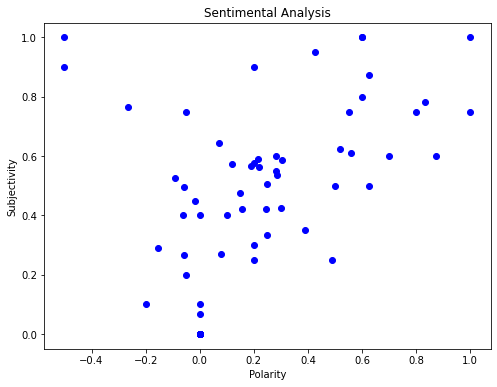

In [28]:
#plot the Subjectivity and polarity

plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='blue')
plt.title('Sentimental Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [33]:
#Get positive tweets
ptweets=df[df.Analysis=='Positive']

round((ptweets.shape[0]/df.shape[0]),1)*100

40.0

In [34]:
#Get Negative tweets
ptweets=df[df.Analysis=='Negative']

round((ptweets.shape[0]/df.shape[0]),1)*100

10.0

In [35]:
#Get Neutral tweets
ptweets=df[df.Analysis=='Neutral']

round((ptweets.shape[0]/df.shape[0]),1)*100

50.0

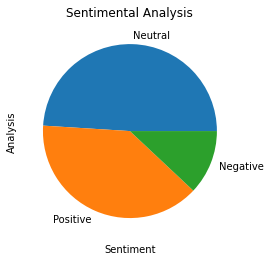

In [38]:
#show value content
df['Analysis'].value_counts()

#plot and visualise the counts
plt.title('Sentimental Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['Analysis'].value_counts().plot(kind='pie')
plt.show()